In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostClassifier,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor, ExtraTreesRegressor
from sklearn.metrics import classification_report, r2_score, f1_score

In [19]:
df = pd.read_csv('Car.csv')
df

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),USED,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16729,Toyota,2014.0,Alphard,SYC Cars,2014 Toyota Alphard,USED,Automatic,-,Front,Unleaded,-,66000,Grey / -,"Rocklea, QLD",-,Commercial,7 Seats,NaN,29500
16730,Mercedes-Benz,2012.0,S-Class,USED Dealer ad,2012 Mercedes-Benz S-Class CDI BlueTEC,USED,Automatic,-,Rear,Diesel,-,117432,Silver / -,"Port Melbourne, VIC",-,NaN,NaN,NaN,39888
16731,Suzuki,2022.0,Vitara,Bremer Suzuki - New,2022 Suzuki Vitara 1.6L,DEMO,Automatic,"4 cyl, 1.6 L",Front,Unleaded,6.2 L / 100 km,5165,Yellow / -,"Dinmore, QLD",4 cyl,SUV,4 Doors,5 Seats,35280
16732,Mercedes-Benz,2016.0,GLC250,SUV,2016 Mercedes-Benz GLC250,USED,Automatic,"4 cyl, 2 L",AWD,Premium,7.2 L / 100 km,85525,Grey / Black,"Albion, QLD",4 cyl,SUV,4 Doors,5 Seats,41888


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16732 non-null  object 
 7   Engine             16733 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16733 non-null  object 
 10  FuelConsumption    16733 non-null  object 
 11  Kilometres         16733 non-null  object 
 12  ColourExtInt       16733 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  16733 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors              151

In [21]:
df.describe()

,Year
count,16733.000000
mean,2016.229248
std,5.247705
min,1940.000000
25%,2013.000000
50%,2017.000000
75%,2020.000000
max,2023.000000


In [22]:
df.isnull().sum()

Brand                   1
Year                    1
Model                   1
Car/Suv                28
Title                   1
UsedOrNew               1
Transmission            2
Engine                  1
DriveType               1
FuelType                1
FuelConsumption         1
Kilometres              1
ColourExtInt            1
Location              450
CylindersinEngine       1
BodyType              282
Doors                1604
Seats                1705
Price                   3
dtype: int64

In [23]:
df

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),USED,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16729,Toyota,2014.0,Alphard,SYC Cars,2014 Toyota Alphard,USED,Automatic,-,Front,Unleaded,-,66000,Grey / -,"Rocklea, QLD",-,Commercial,7 Seats,NaN,29500
16730,Mercedes-Benz,2012.0,S-Class,USED Dealer ad,2012 Mercedes-Benz S-Class CDI BlueTEC,USED,Automatic,-,Rear,Diesel,-,117432,Silver / -,"Port Melbourne, VIC",-,NaN,NaN,NaN,39888
16731,Suzuki,2022.0,Vitara,Bremer Suzuki - New,2022 Suzuki Vitara 1.6L,DEMO,Automatic,"4 cyl, 1.6 L",Front,Unleaded,6.2 L / 100 km,5165,Yellow / -,"Dinmore, QLD",4 cyl,SUV,4 Doors,5 Seats,35280
16732,Mercedes-Benz,2016.0,GLC250,SUV,2016 Mercedes-Benz GLC250,USED,Automatic,"4 cyl, 2 L",AWD,Premium,7.2 L / 100 km,85525,Grey / Black,"Albion, QLD",4 cyl,SUV,4 Doors,5 Seats,41888


In [24]:
df = df.drop(columns=['Location'], index=1)

In [25]:
df

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),USED,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,4 cyl,SUV,4 Doors,7 Seats,51990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,4 cyl,SUV,4 Doors,5 Seats,34990
5,Toyota,2004.0,Estima,ON FOUR WHEELS,2004 Toyota Estima T EDITION,USED,Automatic,-,Other,Unleaded,-,160230,Grey / -,-,Commercial,NaN,NaN,9990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16729,Toyota,2014.0,Alphard,SYC Cars,2014 Toyota Alphard,USED,Automatic,-,Front,Unleaded,-,66000,Grey / -,-,Commercial,7 Seats,NaN,29500
16730,Mercedes-Benz,2012.0,S-Class,USED Dealer ad,2012 Mercedes-Benz S-Class CDI BlueTEC,USED,Automatic,-,Rear,Diesel,-,117432,Silver / -,-,NaN,NaN,NaN,39888
16731,Suzuki,2022.0,Vitara,Bremer Suzuki - New,2022 Suzuki Vitara 1.6L,DEMO,Automatic,"4 cyl, 1.6 L",Front,Unleaded,6.2 L / 100 km,5165,Yellow / -,4 cyl,SUV,4 Doors,5 Seats,35280
16732,Mercedes-Benz,2016.0,GLC250,SUV,2016 Mercedes-Benz GLC250,USED,Automatic,"4 cyl, 2 L",AWD,Premium,7.2 L / 100 km,85525,Grey / Black,4 cyl,SUV,4 Doors,5 Seats,41888


In [26]:
encoder = OrdinalEncoder()
df['Transmission'] = LabelEncoder().fit_transform(df['Transmission'])
df[['Brand','Model','Car/Suv','Title','UsedOrNew','Engine','DriveType','FuelType','FuelConsumption','ColourExtInt','CylindersinEngine','BodyType','Doors','Seats']] = encoder.fit_transform(df[['Brand','Model','Car/Suv','Title','UsedOrNew','Engine','DriveType','FuelType','FuelConsumption','ColourExtInt','CylindersinEngine','BodyType','Doors','Seats']])

In [27]:
df.replace(['-','POA','- / -','DEMO'],np.nan,inplace=True)

In [28]:
df.dropna(inplace=True)

In [29]:
df

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,CylindersinEngine,BodyType,Doors,Seats,Price
0,68.0,2022.0,624.0,509.0,7850.0,2.0,1,33.0,1.0,1.0,144.0,5595,670.0,7.0,6.0,5.0,10.0,51990
2,4.0,2022.0,62.0,161.0,7451.0,2.0,1,31.0,4.0,7.0,123.0,8472,425.0,7.0,2.0,1.0,7.0,108988
3,51.0,2011.0,274.0,161.0,1814.0,2.0,1,97.0,4.0,7.0,15.0,136517,715.0,10.0,2.0,1.0,7.0,32990
4,62.0,2022.0,127.0,469.0,7819.0,2.0,1,24.0,2.0,8.0,117.0,1035,328.0,7.0,6.0,5.0,8.0,34990
6,43.0,2017.0,630.0,469.0,4754.0,2.0,1,31.0,1.0,1.0,108.0,67662,670.0,7.0,6.0,1.0,7.0,62280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16727,32.0,2015.0,420.0,587.0,3552.0,2.0,1,27.0,2.0,8.0,126.0,54359,535.0,7.0,9.0,5.0,8.0,21450
16728,54.0,2021.0,591.0,469.0,7236.0,2.0,1,31.0,2.0,8.0,126.0,32977,615.0,7.0,6.0,5.0,8.0,36770
16731,70.0,2022.0,740.0,90.0,7885.0,0.0,1,27.0,2.0,8.0,119.0,5165,817.0,7.0,6.0,5.0,8.0,35280
16732,51.0,2016.0,360.0,469.0,4263.0,2.0,1,31.0,1.0,7.0,129.0,85525,328.0,7.0,6.0,5.0,8.0,41888


In [30]:
scaler  = MinMaxScaler()

df[['Brand','Year','Model','Car/Suv','Title','Engine','FuelType','FuelConsumption','Kilometres','ColourExtInt','CylindersinEngine','BodyType','Doors','Seats']] = scaler.fit_transform(df[['Brand','Year','Model','Car/Suv','Title','Engine','FuelType','FuelConsumption','Kilometres','ColourExtInt','CylindersinEngine','BodyType','Doors','Seats']])

In [31]:
df

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,CylindersinEngine,BodyType,Doors,Seats,Price
0,0.906667,0.977778,0.799743,0.842017,0.893215,2.0,1,0.307692,1.0,0.125,0.922581,0.010632,0.804322,0.666667,0.666667,0.666667,0.833333,51990
2,0.053333,0.977778,0.078306,0.257143,0.847791,2.0,1,0.288462,4.0,0.875,0.787097,0.016100,0.510204,0.666667,0.222222,0.000000,0.583333,108988
3,0.680000,0.733333,0.350449,0.257143,0.206056,2.0,1,0.923077,4.0,0.875,0.090323,0.259457,0.858343,1.000000,0.222222,0.000000,0.583333,32990
4,0.826667,0.977778,0.161746,0.774790,0.889686,2.0,1,0.221154,2.0,1.000,0.748387,0.001965,0.393758,0.666667,0.666667,0.666667,0.666667,34990
6,0.573333,0.866667,0.807445,0.774790,0.540756,2.0,1,0.288462,1.0,0.125,0.690323,0.128594,0.804322,0.666667,0.666667,0.000000,0.583333,62280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16727,0.426667,0.822222,0.537869,0.973109,0.403916,2.0,1,0.250000,2.0,1.000,0.806452,0.103311,0.642257,0.666667,1.000000,0.666667,0.666667,21450
16728,0.720000,0.955556,0.757381,0.774790,0.823315,2.0,1,0.288462,2.0,1.000,0.806452,0.062673,0.738295,0.666667,0.666667,0.666667,0.666667,36770
16731,0.933333,0.977778,0.948652,0.137815,0.897199,0.0,1,0.250000,2.0,1.000,0.761290,0.009814,0.980792,0.666667,0.666667,0.666667,0.666667,35280
16732,0.680000,0.844444,0.460847,0.774790,0.484859,2.0,1,0.288462,1.0,0.875,0.825806,0.162543,0.393758,0.666667,0.666667,0.666667,0.666667,41888


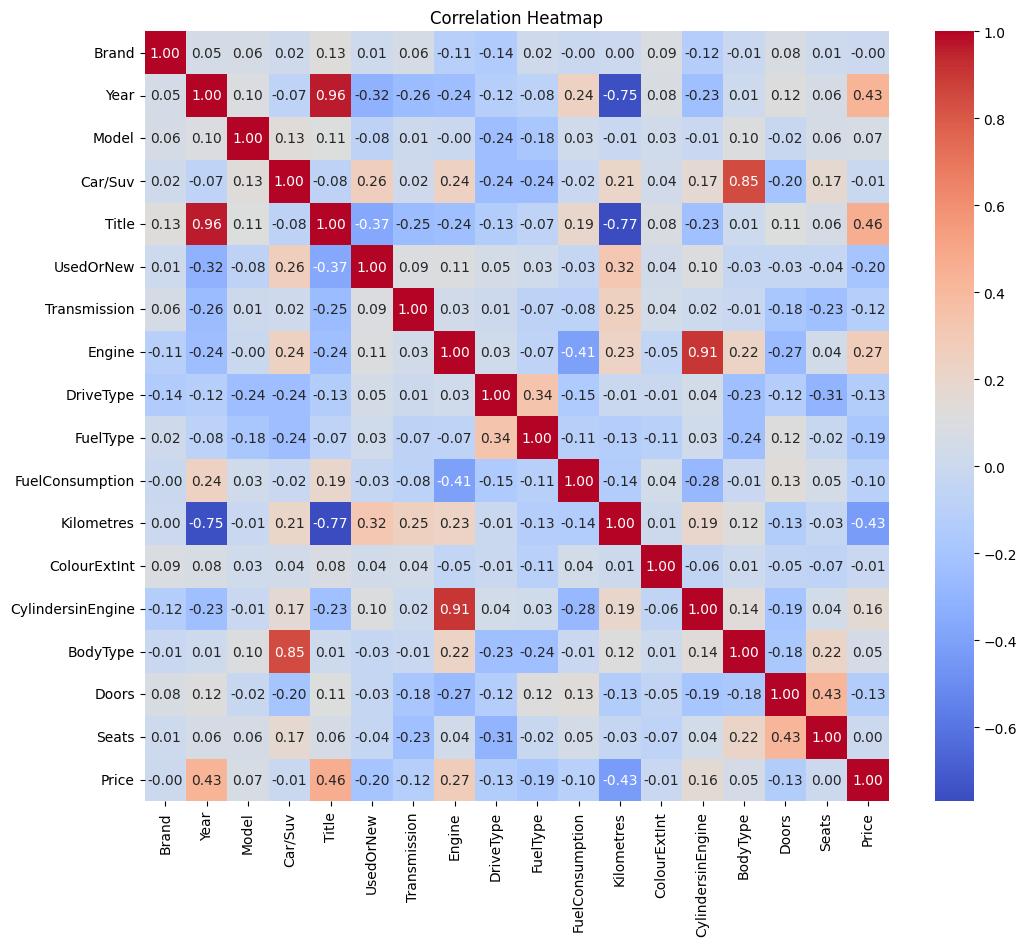

In [32]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [33]:
X = df.drop(columns=['Price'], axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [42]:
models = {
    
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Bagging": BaggingRegressor(),
    "Extra Trees": ExtraTreesRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy:", r2_score(y_test, y_pred))

Random Forest Accuracy: 0.8526882704256968
Gradient Boosting Accuracy: 0.8031449511270867
Bagging Accuracy: 0.8189014549787861
Extra Trees Accuracy: 0.8840262291300639
